In [1]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.model_selection import train_test_split
import mglearn
import graphviz
%matplotlib inline

/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


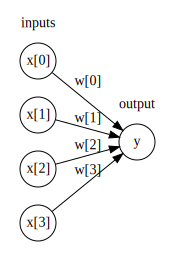

In [2]:
mglearn.plots.plot_logistic_regression_graph()

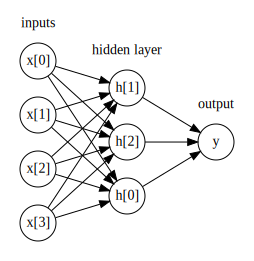

In [3]:
mglearn.plots.plot_single_hidden_layer_graph()

Text(0, 0.5, 'Feature 1')

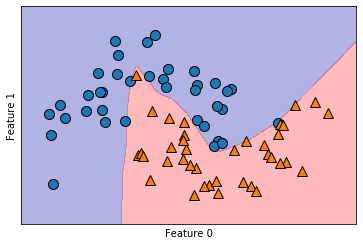

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train , X_test , y_train , y_test = train_test_split(X,y,stratify=y,random_state=42)

mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [5]:
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

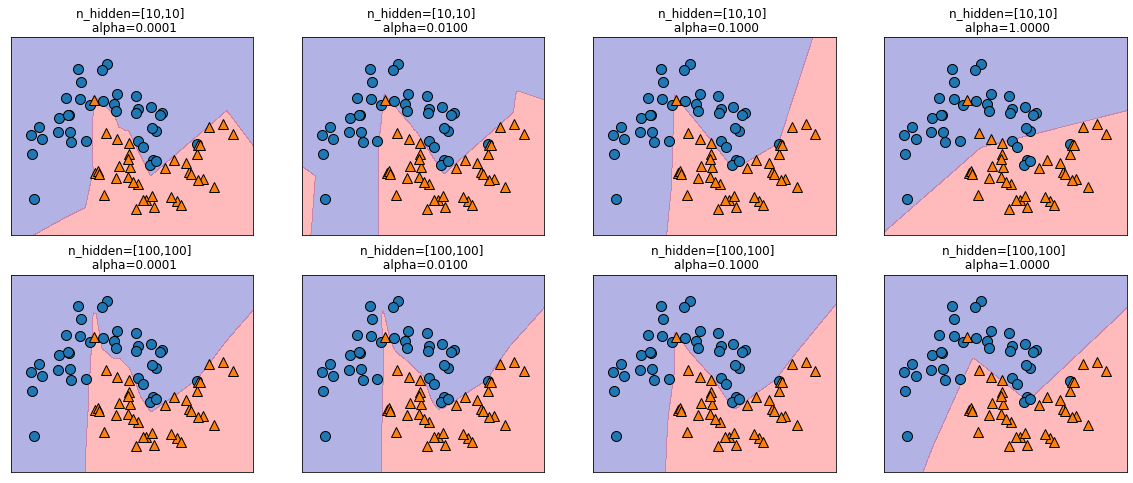

In [6]:
fig,axes = plt.subplots(2,4,figsize=(20,8))
for axx , n_hidden_nodes in zip (axes,[10,100]):
    for ax,alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp = MLPClassifier(solver='lbfgs' , random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{},{}] \n alpha={:.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha))


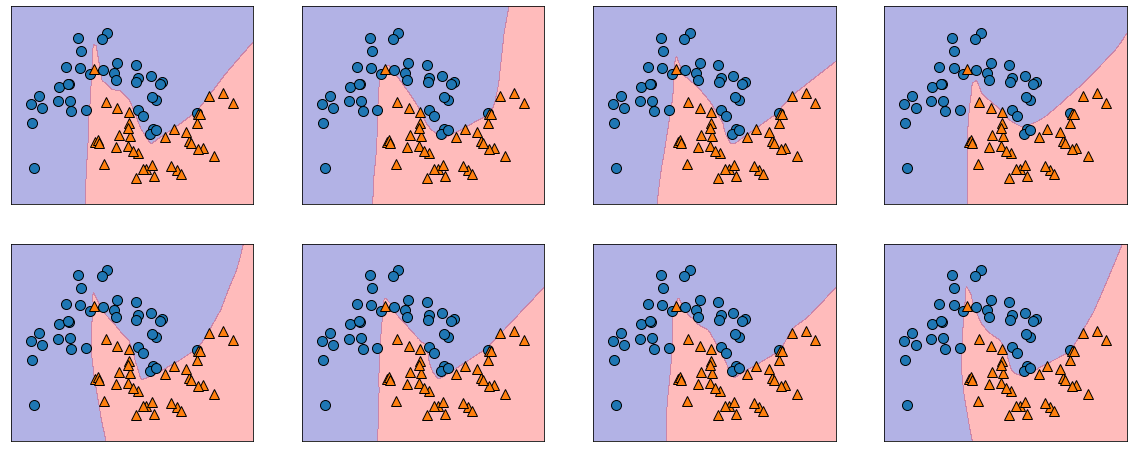

In [7]:
fig,axes = plt.subplots(2,4,figsize=(20,8))
for i,ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs',random_state=i,hidden_layer_sizes=[100,100])
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [9]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print("Accuracy on training set : {:.2f}".format(mlp.score(X_train,y_train)))
print("Accuracy on test set : {:.2f}".format(mlp.score(X_test,y_test)))


Accuracy on training set : 0.94
Accuracy on test set : 0.92


In [10]:
# 訓練セットの特徴量ごとの平均値を算出
mean_on_train = X_train.mean(axis=0)
# 訓練セットの特徴量ごとの標準偏差を算出
std_on_train = X_train.std(axis=0)

# 平均を引き、標準偏差の逆数でスケール変換する
# これで mean=0 , std=1 になる
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 全く同じ変換をテストセットにもやる
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled,y_test)))


Accuracy on training set: 0.991
Accuracy on test set: 0.965
/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [11]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled,y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on ttestraining set: {:.3f}".format(mlp.score(X_test_scaled,y_test)))


Accuracy on training set: 1.000
Accuracy on ttestraining set: 0.972


In [12]:
mlp = MLPClassifier(max_iter=1000,alpha=1,random_state=0)
mlp.fit(X_train_scaled,y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on ttestraining set: {:.3f}".format(mlp.score(X_test_scaled,y_test)))


Accuracy on training set: 0.988
Accuracy on ttestraining set: 0.972


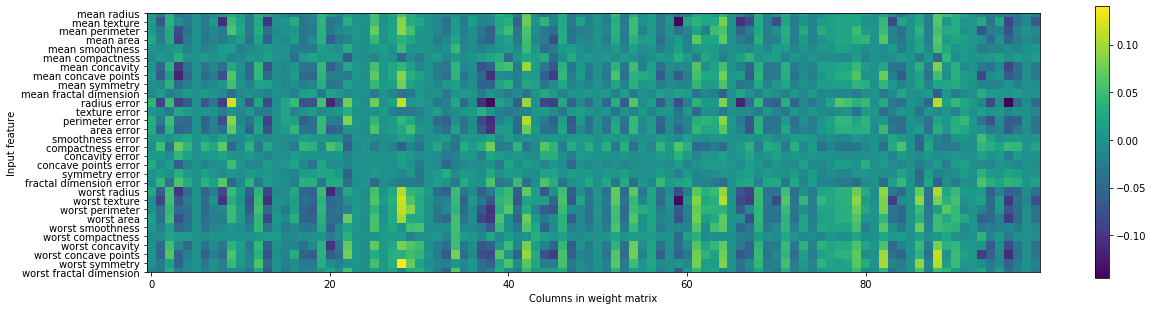

In [13]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X,y = make_circles(noise=0.25,factor=0.5,random_state=1)

# わかりやすく、blue、redにする
y_named = np.array(["blue","red"])[y]

# train_test_splitは任意の数の配列に適用できる
# 全ての配列は整合するように分割される
X_train,X_test,y_train_named,y_test_named, y_train , y_test = train_test_split(X,y_named,y,random_state=0)

# 勾配ブースティングモデルを構築
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train_named)

print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))


X_test.shape: (25, 2)
Decision function shape: (25,)


In [15]:
print("Decision function : \n{}".format(gbrt.decision_function(X_test)[:6]))


Decision function : 
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [16]:
print("Thresholded dicision function:\n{}".format(gbrt.decision_function(X_test) > 0))
print("Prediction:\n{}".format(gbrt.predict(X_test)))

Thresholded dicision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Prediction:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [17]:
# True/False を 0/1 に
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# 0/1 を classes_ のインデックスに使う
pred = gbrt.classes_[greater_zero]
# pred は gbrt.predict の出力と同じになる
print("pred is equal to predictions: {}".format(np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


In [18]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimun: {:.2f} maximum: {:.2f}".format(np.min(decision_function),np.max(decision_function)))

Decision function minimun: -7.69 maximum: 4.29


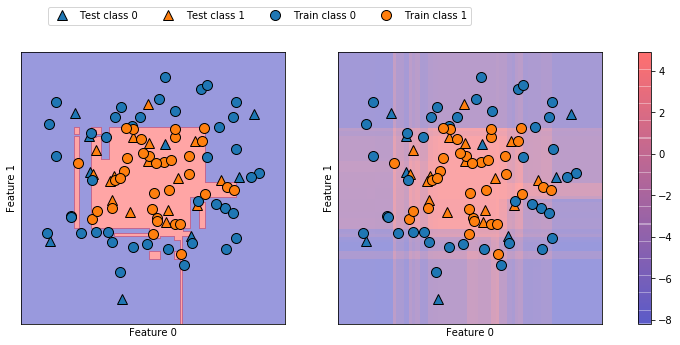

In [19]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=.4,cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

cbar = plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(["Test class 0","Test class 1","Train class 0","Train class 1"],ncol=4,loc=(.1,1.1))

In [20]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))


Shape of probabilities: (25, 2)


In [21]:
print("predicted probabilities : \n{}".format(gbrt.predict_proba(X_test[:6])))

predicted probabilities : 
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


In [22]:
fig , axes = plt.subplots(1,2,figsize=(13,5))

mglearn.tools.plot_2d_separator(
    gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt,X,ax=axes[1],alpha=.5,cm=mglearn.ReBl,function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel=("Feature 0")
    ax.set_ylabel=("Feature 1")
cbar = plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(["Test class 0","Test class 1","Train class 0","Train class 1"],ncol=4,loc=(.1,1.1))

In [23]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train,X_test,y_train,y_test =  train_test_split(
    iris.data,iris.target,random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01,random_state=0)
gbrt.fit(X_train,y_train)

print("Decision function shape : {}".format(gbrt.decision_function(X_test).shape))
print("Decision function: \n{}".format(gbrt.decision_function(X_test)[:6,:]))

Decision function shape : (38, 3)
Decision function: 
[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In [24]:
print("Argmax of decision function:\n{}".format(np.argmax(gbrt.decision_function(X_test),axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [25]:
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("Sums : {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
Sums : [1. 1. 1. 1. 1. 1.]


In [26]:
print("Argmax of predicted probabilities:\n{}".format(np.argmax(gbrt.predict_proba(X_test),axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

named_target = iris.target_names[y_train]
logreg.fit(X_train,named_target)
print("unique classes in trading data : {}".format(logreg.classes_))
print("predictions : {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test),axis=1)
print("argmax of decision function : {}".format(argmax_dec_func[:10]))
print("argmax combine with classes_ : {}".format(logreg.classes_[argmax_dec_func][:10]))


unique classes in trading data : ['setosa' 'versicolor' 'virginica']
predictions : ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function : [1 0 2 1 1 0 1 2 1 1]
argmax combine with classes_ : ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
